### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [35]:
fileN = 'sample-1'
rate, data = wavfile.read(f'{fileN}.wav')

dt = 1/rate
t = np.linspace(0, (len(data)-1)*dt, len(data))
minsignal, maxsignal = data.min(), data.max()

# Compute Fourier Transform
n = len(data)
fhat = np.fft.fft(data, n)  # computes the fft
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n)  # frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)  # first half index
psd_real = np.abs(psd[idxs_half])  # amplitude for first half


# Filter out noise
sort_psd = np.sort(psd_real)[::-1]
threshold = sort_psd[1000]
psd_idxs = psd > threshold  # array of 0 and 1
psd_clean = psd * psd_idxs  # zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat  # used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean)  # inverse fourier transform

/home/vic/.local/share/virtualenvs/course-repo-fBrog0EP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/vic/.local/share/virtualenvs/course-repo-fBrog0EP/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


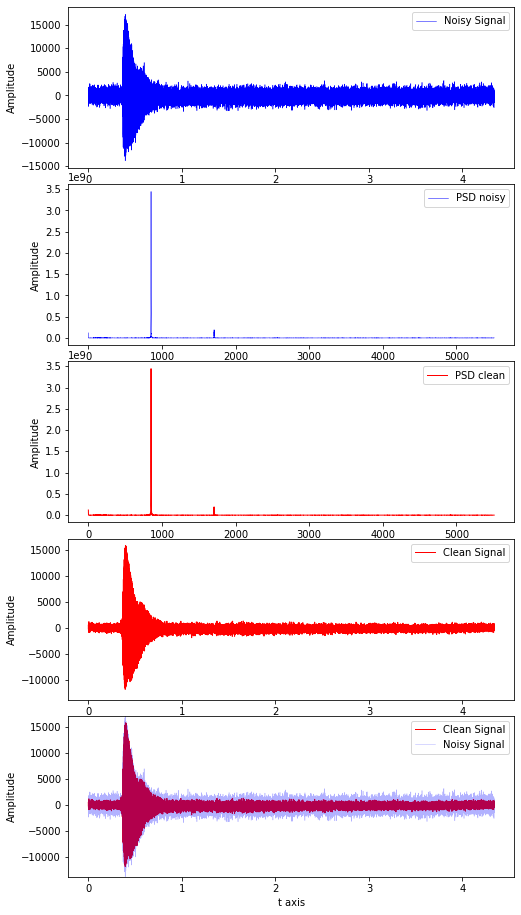

In [36]:
fig, ax = plt.subplots(5, 1, figsize=(8, 16))
ax[0].plot(t, data, color='b', lw=0.5, label='Noisy Signal')
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Amplitude')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]),
           color='b', lw=0.5, label='PSD noisy')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]),
           color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Amplitude')
ax[3].legend()

ax[4].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal')
ax[4].plot(t, data, color='b', lw=0.5, label='Noisy Signal', alpha=0.3)
ax[4].set_ylim([minsignal, maxsignal])
ax[4].set_xlabel('t axis')
ax[4].set_ylabel('Amplitude')
ax[4].legend()

plt.subplots_adjust(hspace=0.1)
plt.show()

In [37]:
wavfile.write(f'{fileN}-reduce.wav', rate, signal_filtered.astype(data.dtype))

/tmp/ipykernel_36715/3822230986.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  wavfile.write(f'{fileN}-reduce.wav', rate, signal_filtered.astype(data.dtype))


In [38]:
from IPython.core.display import HTML


def wavPlayer(filepath):
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """ % (filepath)
    display(HTML(src))

In [45]:
wavPlayer(f'{fileN}.wav')

In [40]:
wavPlayer(f'{fileN}-reduce.wav')

In [41]:
wavPlayer('sample-1.wav')

In [42]:
wavPlayer('sample-1-reduce.wav')

In [43]:
wavPlayer('sample-2.wav')

In [44]:
wavPlayer('sample-2-reduce.wav')